In [ ]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf

In [ ]:
# loading mnist dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
print(y_train.shape,x_test.shape)

(60000,) (10000, 28, 28)


In [ ]:
# normalizing x_train
x_train=x_train/255.0

In [ ]:
# One hot encoding y_train
y_train=pd.get_dummies(y_train)

ValueError: ignored

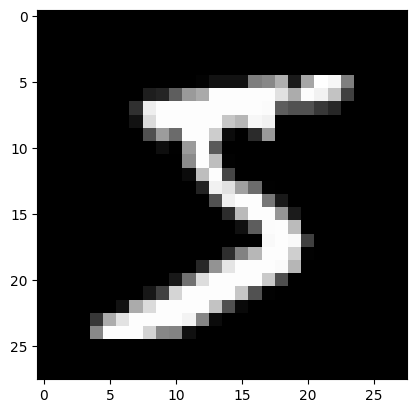

In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()

# Objective 1: Observe validation accuracy vs epoch relation for different batch size (16,32,64,128,256,512,1024,2048)

In [ ]:
# Building model
lst=[16,32,64,128,256,512,1024,2048]
accuracy=[]
loss=[]
epoch=15

for i in lst:
  # model creation
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input((28,28),name='InputLayer'))
  model.add(tf.keras.layers.Flatten(name='Flatten'))
  model.add(tf.keras.layers.Dense(256,activation='relu',name='HiddenLayer1'))
  model.add(tf.keras.layers.Dense(64,activation='relu',name='HiddenLayer2'))
  model.add(tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer'))
  model.summary()

  # model compilation
  model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics='acc')

  # model fit
  model.fit(x_train,y_train,batch_size=i,epochs=epoch,validation_split=0.1)

  # data extraction
  val_a=model.history.history['val_acc']
  val_l=model.history.history['val_loss']
  accuracy.extend(val_a)
  loss.extend(val_l)
  epoch+=5
  # model deletion
  del model


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 256)               200960    
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
3375/3375 [==============================] - 14s 4ms/step - loss: 0.4726 - acc: 0.8720 - val_loss: 0.2245 - val_acc: 0.9353
Epoch 2/15
3375/3375 [======================

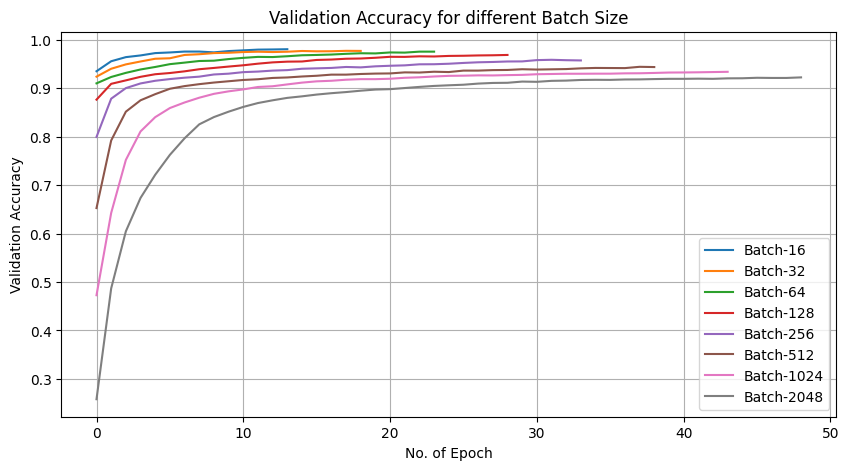

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(accuracy[0:14],label='Batch-16')
plt.plot(accuracy[15:34],label='Batch-32')
plt.plot(accuracy[35:59],label='Batch-64')
plt.plot(accuracy[60:89],label='Batch-128')
plt.plot(accuracy[90:124],label='Batch-256')
plt.plot(accuracy[125:164],label='Batch-512')
plt.plot(accuracy[165:209],label='Batch-1024')
plt.plot(accuracy[210:259],label='Batch-2048')
plt.legend()
plt.title('Validation Accuracy for different Batch Size')
plt.xlabel('No. of Epoch')
plt.ylabel('Validation Accuracy')
plt.grid(visible=True,axis='both')
plt.show()


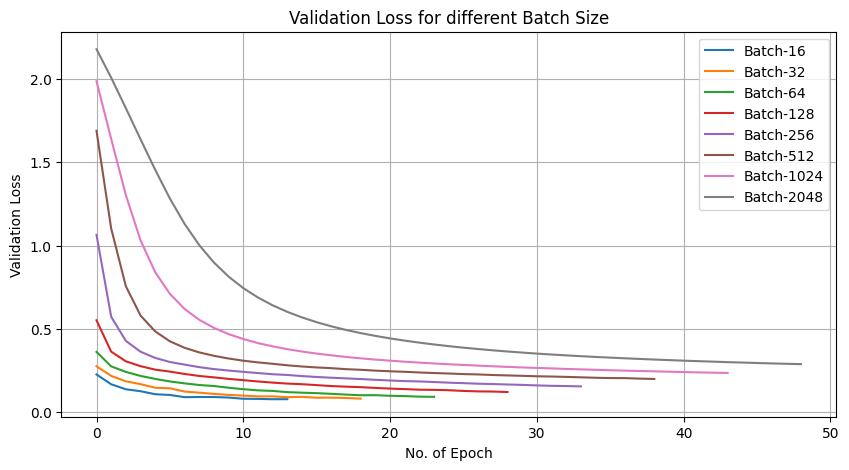

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(loss[0:14],label='Batch-16')
plt.plot(loss[15:34],label='Batch-32')
plt.plot(loss[35:59],label='Batch-64')
plt.plot(loss[60:89],label='Batch-128')
plt.plot(loss[90:124],label='Batch-256')
plt.plot(loss[125:164],label='Batch-512')
plt.plot(loss[165:209],label='Batch-1024')
plt.plot(loss[210:259],label='Batch-2048')
plt.legend()
plt.title('Validation Loss for different Batch Size')
plt.xlabel('No. of Epoch')
plt.ylabel('Validation Loss')
plt.grid(visible=True,axis='both')
plt.show()